In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lb
import sounddevice as sd
from Griffin_Lim import *
from scipy import signal as sgn

## Audios importados

In [2]:
voice, fs1 = lb.load('voice.wav') 
bosque, fs2 = lb.load('bosque.wav')
guitarra, fs3 = lb.load('guitarra.wav')

## Creacion senial de 5 tono 

In [3]:
fs = 44100
n = np.linspace(0,10,fs)

tonos = np.sin(2*np.pi*100*n) + np.sin(2*np.pi*260*n) + np.sin(2*np.pi*588*n) + np.sin(2*np.pi*878*n) +np.sin(2*np.pi*1206*n)

### Espectrogramas


In [4]:
f1, t1, y_voice = sgn.stft(voice, fs1, window = 'hann', nperseg = 1000)
f2, t2, y_bosque = sgn.stft(bosque, fs2, window = 'hann', nperseg = 1000)
f3, t3, y_guitarra = sgn.stft(guitarra, fs3, window = 'hann', nperseg = 1000)
f4, t4, y_tonos = sgn.stft(tonos, fs, window = 'hann', nperseg = 1000)

## Implementacion de algoritmo

In [8]:
t1,voice_aprox = griffin_lim(y_voice, fs1,10)
t2,bosque_aprox = griffin_lim(y_bosque,fs2,10)
t3,guitarra_aprox = griffin_lim(y_guitarra,fs3,10)
t4,tonos_aprox = griffin_lim(y_tonos,fs,10)

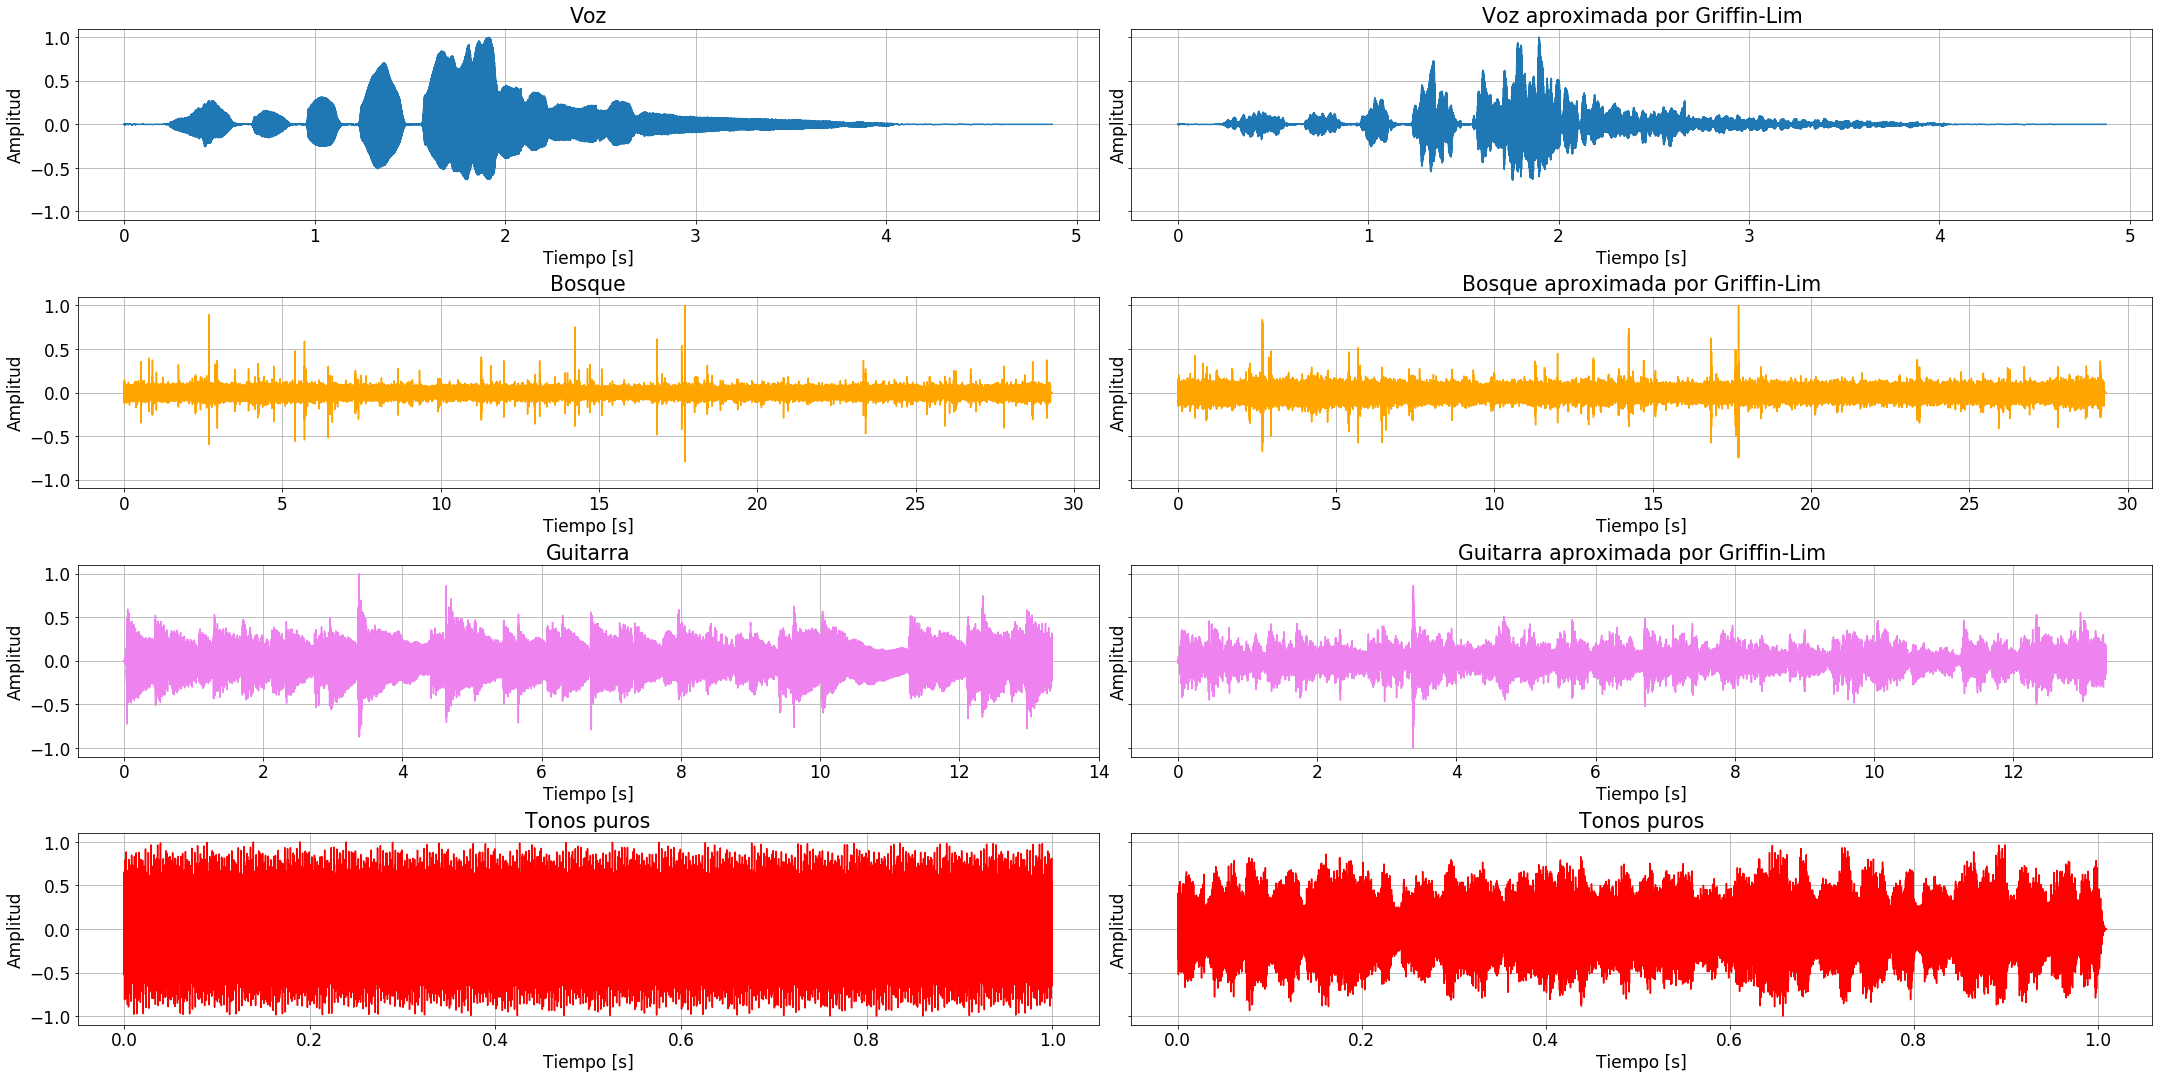

In [30]:
plt.rcParams.update({'font.size': 17})
fig, axs = plt.subplots(4, 2, sharex=False, sharey=True, figsize=[30, 15])
axs[0, 0].plot(np.linspace(0, len(voice)/fs1, len(voice)), voice/max(abs(voice)))
axs[0, 0].set_title('Voz')
axs[1, 0].plot(np.linspace(0, len(bosque)/fs2, len(bosque)), bosque/max(abs(bosque)), color='orange')
axs[1, 0].set_title('Bosque')
axs[2, 0].plot(np.linspace(0, len(guitarra)/fs3, len(guitarra)), guitarra/max(abs(guitarra)),color='violet')
axs[2, 0].set_title('Guitarra')
axs[3, 0].plot(np.linspace(0, len(tonos)/fs, len(tonos)), tonos/max(abs(tonos)), color='red')
axs[3, 0].set_title('Tonos puros')
               
axs[0, 1].plot(t1, voice_aprox/max(abs(voice_aprox)))
axs[0, 1].set_title('Voz aproximada por Griffin-Lim')
axs[1, 1].plot(t2, bosque_aprox/max(abs(bosque_aprox)), color='orange')
axs[1, 1].set_title('Bosque aproximada por Griffin-Lim')
axs[2, 1].plot(t3, guitarra_aprox/max(abs(guitarra_aprox)),color='violet')
axs[2, 1].set_title('Guitarra aproximada por Griffin-Lim')
axs[3, 1].plot(t4, tonos_aprox/max(abs(tonos_aprox)), color='red')
axs[3, 1].set_title('Tonos puros')
fig.tight_layout()

axs.flat[0].set(ylabel='Amplitud', xlabel='Tiempo [s]')
axs.flat[1].set(ylabel='Amplitud', xlabel='Tiempo [s]')
axs.flat[2].set(ylabel='Amplitud', xlabel='Tiempo [s]')
axs.flat[3].set(ylabel='Amplitud', xlabel='Tiempo [s]')
axs.flat[4].set(ylabel='Amplitud', xlabel='Tiempo [s]')
axs.flat[5].set(ylabel='Amplitud', xlabel='Tiempo [s]')
axs.flat[6].set(ylabel='Amplitud', xlabel='Tiempo [s]')
axs.flat[7].set(ylabel='Amplitud', xlabel='Tiempo [s]')

plt.subplots_adjust( 
                    hspace=0.4)
for ax in axs.flat:
    ax.grid()

4.8723809523809525

107436